# Violations of Regression Models

When using a regression to fit a model to our data, the assumptions of regression analysis myst be satisfied in order to ensure good parameter estimates and accurate fit statistics. We would like parameters to be:
* unbiased (expected value over different samples is the true value)
* consistent (converging to the true value with many samples), and
* efficient (minimized variance)


# Focus on the Residuals

Rather than focusing on your model construction, it is possible to gain a huge amount of information from your residuals (errors). Your model may be incredibly complex and impossible to analyze, but as long as you have predictions and observed values, you can compute residuals. Once you have your residuals you can perform many statistical tests.

If your residuals do not follow a given distribution (usually normal, but depends on your model), then you know that something is wrong and you should be concerned with the accuracy of your predictions.

# Residuals not normally-distributed

If the error term is not normally distributed, then our tests of statistical significance will be off. Fortunately, the central limit theorem tells us that, for large enough data samples, the coefficient distributions will be close to normal even if the errors are not. Therefore our analysis will still be valid for large data datasets.


# Heteroskedasticity

Heteroskedasticity means that the variance of the error terms is not constant across observations. Intuitively, this means that the observations are not uniformly distributed along the regression line. It often occurs in cross-sectional data where the differences in the samples we are measuring lead to differences in the variance.

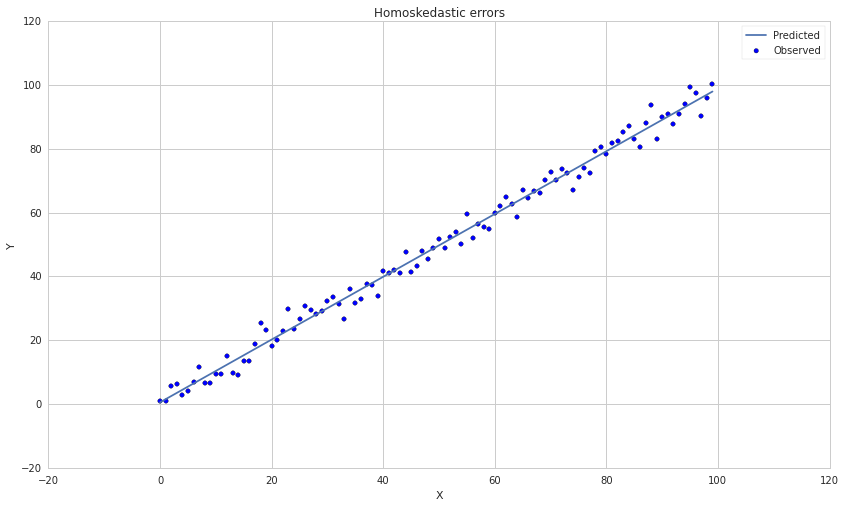

# Serial correlation of errors

A common and serious problem is when errors are correlated across observations (known serial correlation or autocorrelation). This can occur, for instance, when some of the data points are related, or when we use time-series data with periodic fluctuations. If one of the independent variables depends on previous values of the dependent variable - such as when it is equal to the value of the dependent variable in the previous period - or if incorrect model specification leads to autocorrelation, then the coefficient estimates will be inconsistent and therefore invalid. Otherwise, the parameter estimates will be valid, but the fit statistics will be off. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Equity(33729 [DAL])   R-squared:                       0.660
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     486.2
Date:                 Mon, 21 Sep 2015   Prob (F-statistic):           1.44e-60
Time:                         14:32:36   Log-Likelihood:                -610.08
No. Observations:                  252   AIC:                             1224.
Df Residuals:                      250   BIC:                             1231.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         31.0620      0.344     90.425      0.000        30.385    31.739
x1             0.0522      0.002     22.050      0.000         0.048     0.057
==============================================================================
Omnibus:                       30.398   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.557
Skew:                          -0.748   Prob(JB):                     2.11e-10
Kurtosis:                       4.417   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

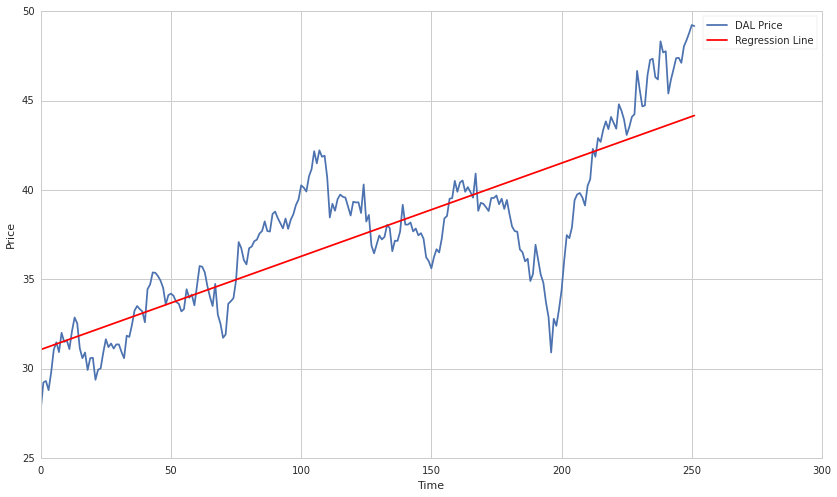

In [7]:
# Load pricing data for an asset
start = '2014-01-01'
end = '2015-01-01'
y = get_pricing('DAL', fields='price', start_date=start, end_date=end)
x = np.arange(len(y))

# Regress pricing data against time
model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

# Construct the fit line
prediction = model.params[0] + model.params[1]*x

# Plot pricing data and regression line
plt.plot(x,y)
plt.plot(x, prediction, color='r')
plt.legend(['DAL Price', 'Regression Line'])
plt.xlabel('Time')
plt.ylabel('Price')

# Print summary of regression results
model.summary()

 # Multicollinearity

When using multiple independent variables, it is important to check for multicollinearity; that is, an approximate linear relation between the independent variables, such as
$$ X_2 \approx 5 X_1 - X_3 + 4.5 $$

With multicollinearity, it is difficult to identify the independent effect of each variable, since we can change around the coefficients according to the linear relation without changing the model. As with truly unnecessary variables, this will usually not hurt the accuracy of the model, but will cloud our analysis. In particular, the estimated coefficients will have large standard errors. The coefficients will also no longer represent the partial effect of each variable, since with multicollinearity we cannot change one variable while holding the others constant.

High correlation between independent variables is indicative of multicollinearity. However, it is not enough, since we would want to detect correlation between one of the variables and a linear combination of the other variables. If we have high R-squared but low t-statistics on the coefficients (the fit is good but the coefficients are not estimated precisely) we may suspect multicollinearity. To resolve the problem, we can drop one of the independent variables involved in the linear relation.

For instance, using two stock indices as our independent variables is likely to lead to multicollinearity. Below we can see that removing one of them improves the t-statistics without hurting R-squared.

Another important thing to determine here is which variable may be the casual one. If we hypothesize that the market influences both MDY and HPQ, then the market is the variable that we should use in our predictive model.

R-squared: 0.902357305418
t-statistics of coefficients:
const   -11.714430
x1       23.783539
x2       -4.528464
dtype: float64
error:  [ 2.20088594  0.01786431  0.01922428]


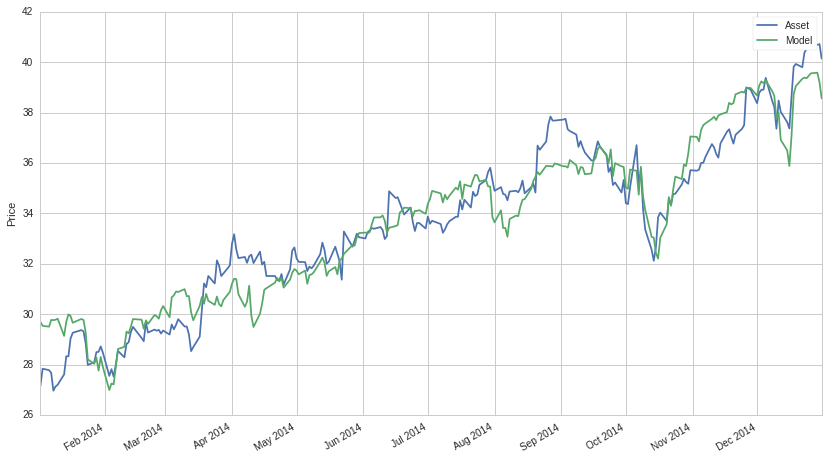

In [4]:
# Load pricing data for asset and two market indices
start = '2014-01-01'
end = '2015-01-01'
b1 = get_pricing('SPY', fields='price', start_date=start, end_date=end)
b2 = get_pricing('MDY', fields='price', start_date=start, end_date=end)
a = get_pricing('HPQ', fields='price', start_date=start, end_date=end)

# Run multiple linear regression
mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1,b2)))).fit()

# Construct fit curve using dependent variables and estimated coefficients
mlr_prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2

# Print regression statistics 
print 'R-squared:', mlr.rsquared_adj
print 't-statistics of coefficients:\n', mlr.tvalues
print 'error: ', mlr.bse

# Plot asset and model
a.plot()
mlr_prediction.plot()
plt.legend(['Asset', 'Model']);
plt.ylabel('Price')

# Example: Anscombe's quartet

Anscombe constructed 4 datasets which not only have the same mean and variance in each variable, but also the same correlation coefficient, regression line, and R-squared regression value. Below, we test this result as well as plotting the datasets. A quick glance at the graphs shows that only the first dataset satisfies the regression model assumptions. Consequently, the high R-squared values of the other three are not meaningful, which agrees with our intuition that the other three are not modeled well by the lines of best fit.

Cofficients: [ 3.00009091  0.50009091] [ 3.00090909  0.5       ] [ 3.00245455  0.49972727] [ 3.00172727  0.49990909]
Pearson r: 0.816420516345 0.816236506 0.81628673949 0.816521436889
R-squared: 0.666542459509 0.666242033727 0.666324041067 0.666707256898


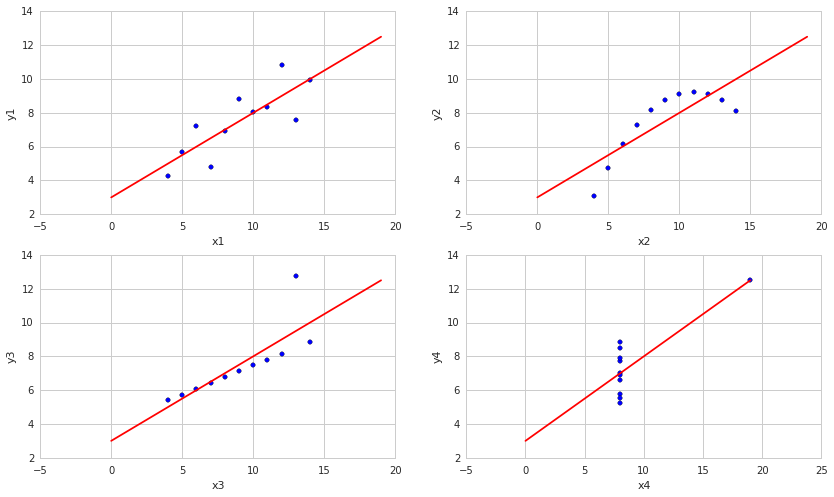

In [12]:
from scipy.stats import pearsonr

# Construct Anscombe's arrays
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Perform linear regressions on the datasets
slr1 = regression.linear_model.OLS(y1, sm.add_constant(x1)).fit()
slr2 = regression.linear_model.OLS(y2, sm.add_constant(x2)).fit()
slr3 = regression.linear_model.OLS(y3, sm.add_constant(x3)).fit()
slr4 = regression.linear_model.OLS(y4, sm.add_constant(x4)).fit()

# Print regression coefficients, Pearson r, and R-squared for the 4 datasets
print 'Cofficients:', slr1.params, slr2.params, slr3.params, slr4.params
print 'Pearson r:', pearsonr(x1, y1)[0], pearsonr(x2, y2)[0], pearsonr(x3, y3)[0], pearsonr(x4, y4)[0]
print 'R-squared:', slr1.rsquared, slr2.rsquared, slr3.rsquared, slr4.rsquared

# Plot the 4 datasets with their regression lines
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
xs = np.arange(20)
ax1.plot(slr1.params[0] + slr1.params[1]*xs, 'r')
ax1.scatter(x1, y1)
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax2.plot(slr2.params[0] + slr2.params[1]*xs, 'r')
ax2.scatter(x2, y2)
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')
ax3.plot(slr3.params[0] + slr3.params[1]*xs, 'r')
ax3.scatter(x3, y3)
ax3.set_xlabel('x3')
ax3.set_ylabel('y3')
ax4.plot(slr4.params[0] + slr4.params[1]*xs, 'r')
ax4.scatter(x4,y4)
ax4.set_xlabel('x4')
ax4.set_ylabel('y4');